# Example of showing the different options for fitting the histograms of coincidences for LinoSPAD2

This example shows how to analyze data and plot Gaussian fits for histograms of timestamp differences.

First, import the necessary libraries and define the absolute path to the folder with the data.

In [5]:
# Libraries
from daplis.functions import fits, sensor_plot, delta_t
import matplotlib.pyplot as plt 


# Absolute path to the folder with the '.dat' data files.
path = r"D:\LinoSPAD2\Data\B7d\CT_HBT\70-77"

Next, plot the sensor population plot to see where the two beams are. For this, the following parameters can be used: "single_file=True" for a quick plot using only the first '.dat' data file, and "fit_peaks=True" to find the peaks above the threshold (median) multiplied by "threshold_multiplier=14".


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\CT_HBT\70-77 < < <




> > > Plotting < < <

Fitting the peaks with gaussian
> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


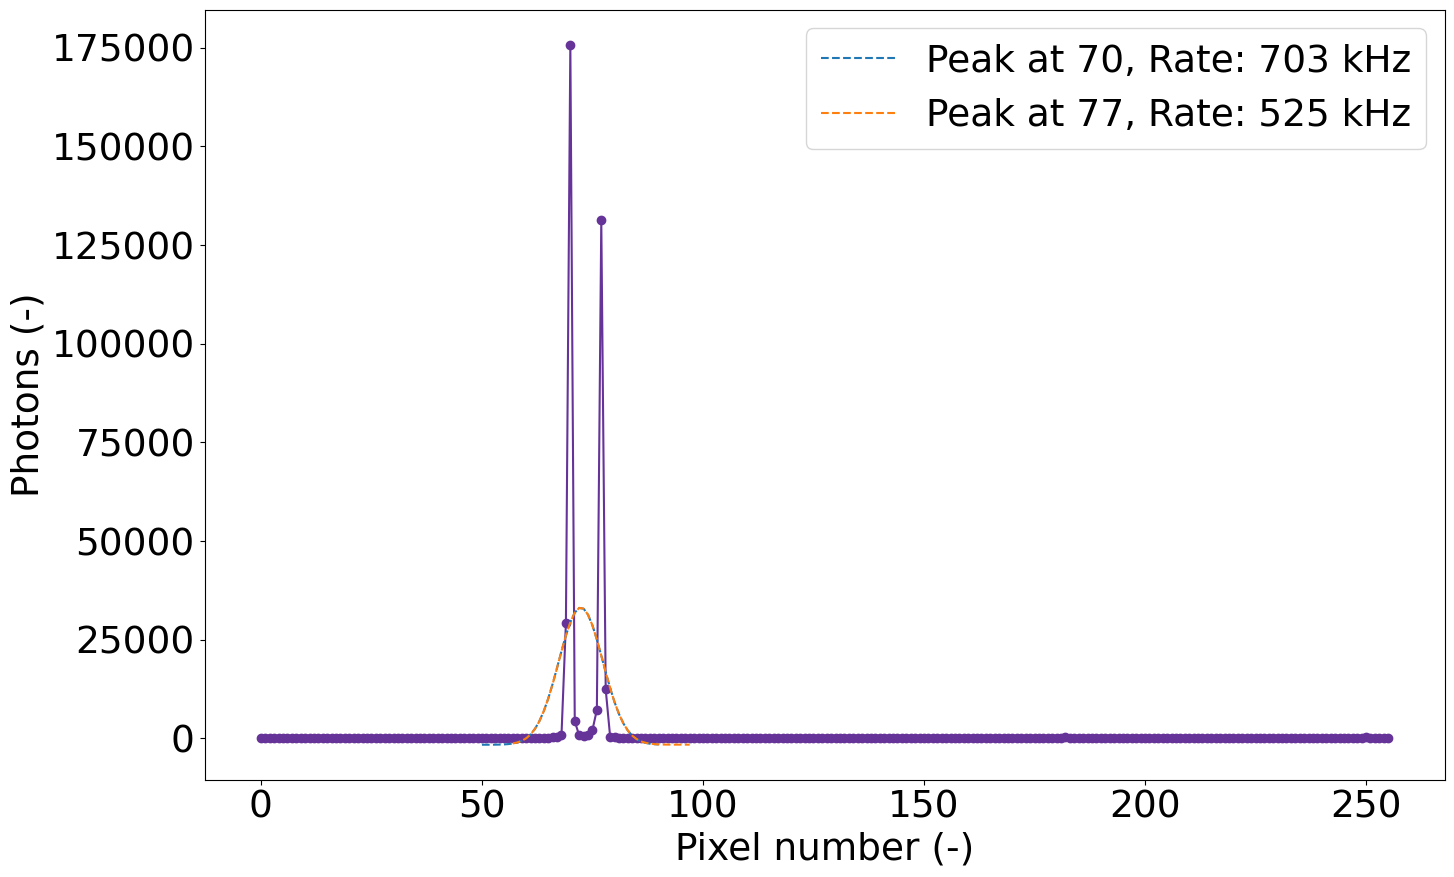

In [6]:
sensor_plot.plot_sensor_population(
    path, 
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    fit_peaks=True,
    single_file=True,
    show_fig=True,
    threshold_multiplier=14,
)

Once the beams positions are known, one can calculate and save timestamp differences. At the same location where the '.dat' data files are stored, a new folder 'delta_ts_data' is created and a '.feather' file with the calculated data is placed there.

In [ ]:
delta_t.calculate_and_save_timestamp_differences(
    path,
    pixels = [[70], [77, 78]],
    rewrite=True,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
)


> > > Collecting data for delta t plot for the requested pixels and saving it to .feather in a cycle < < <




> > > Timestamp differences are saved as0000028100-0000032199.feather in D:\LinoSPAD2\Data\B7d\CT_HBT\70-77\delta_ts_data < < <


Timestamp differences collected in the '.feather' file can be used to plot a histogram with a Gaussian fit of the peak - either HBT or cross-talk. One can input lists of pixels for multiple plots, here the fitting will be done for pairs of pixels 70-77 and 70-78.

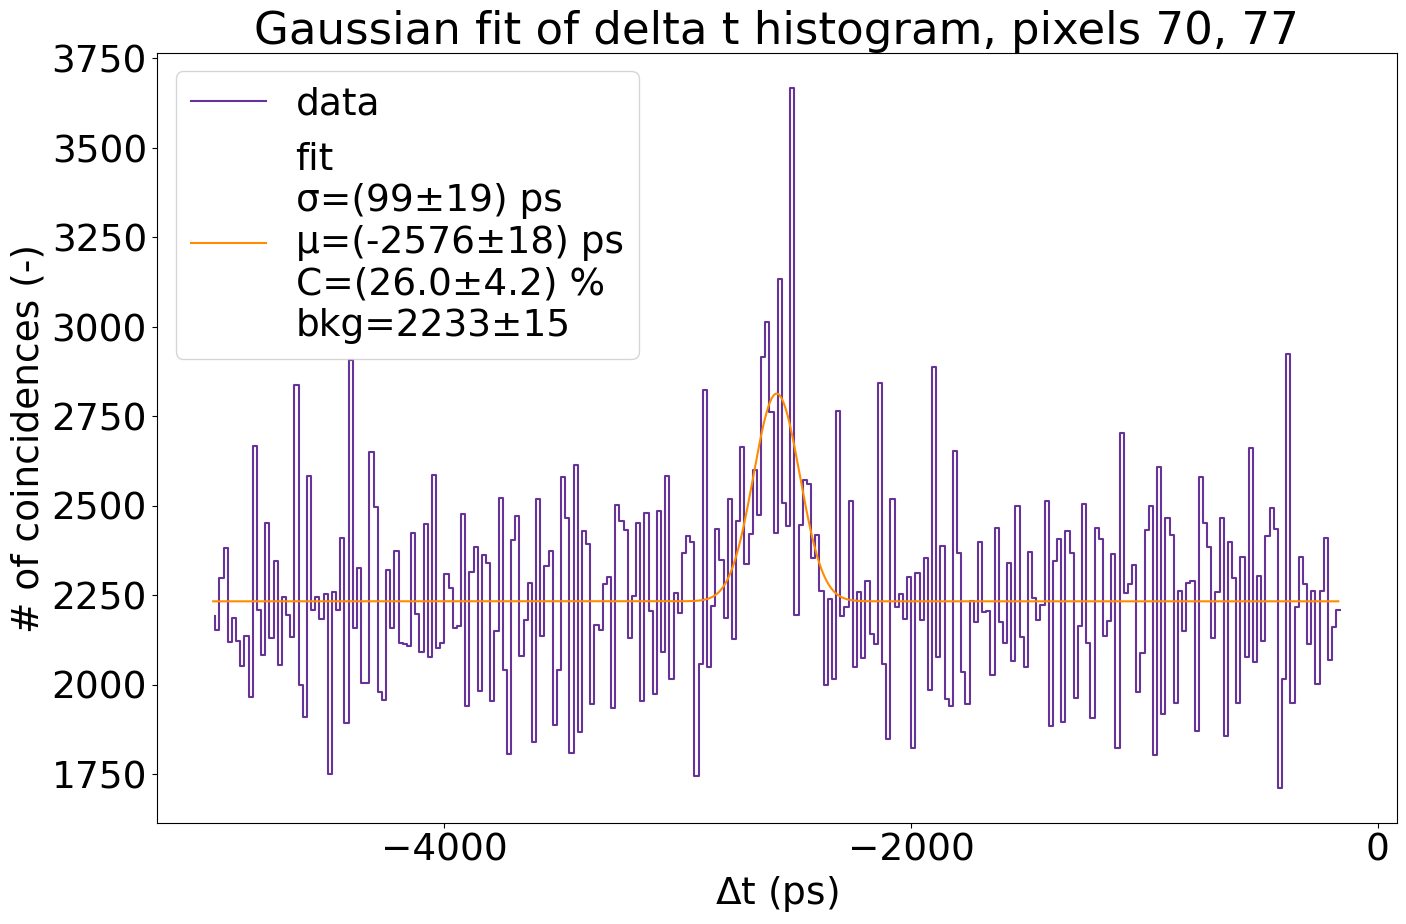

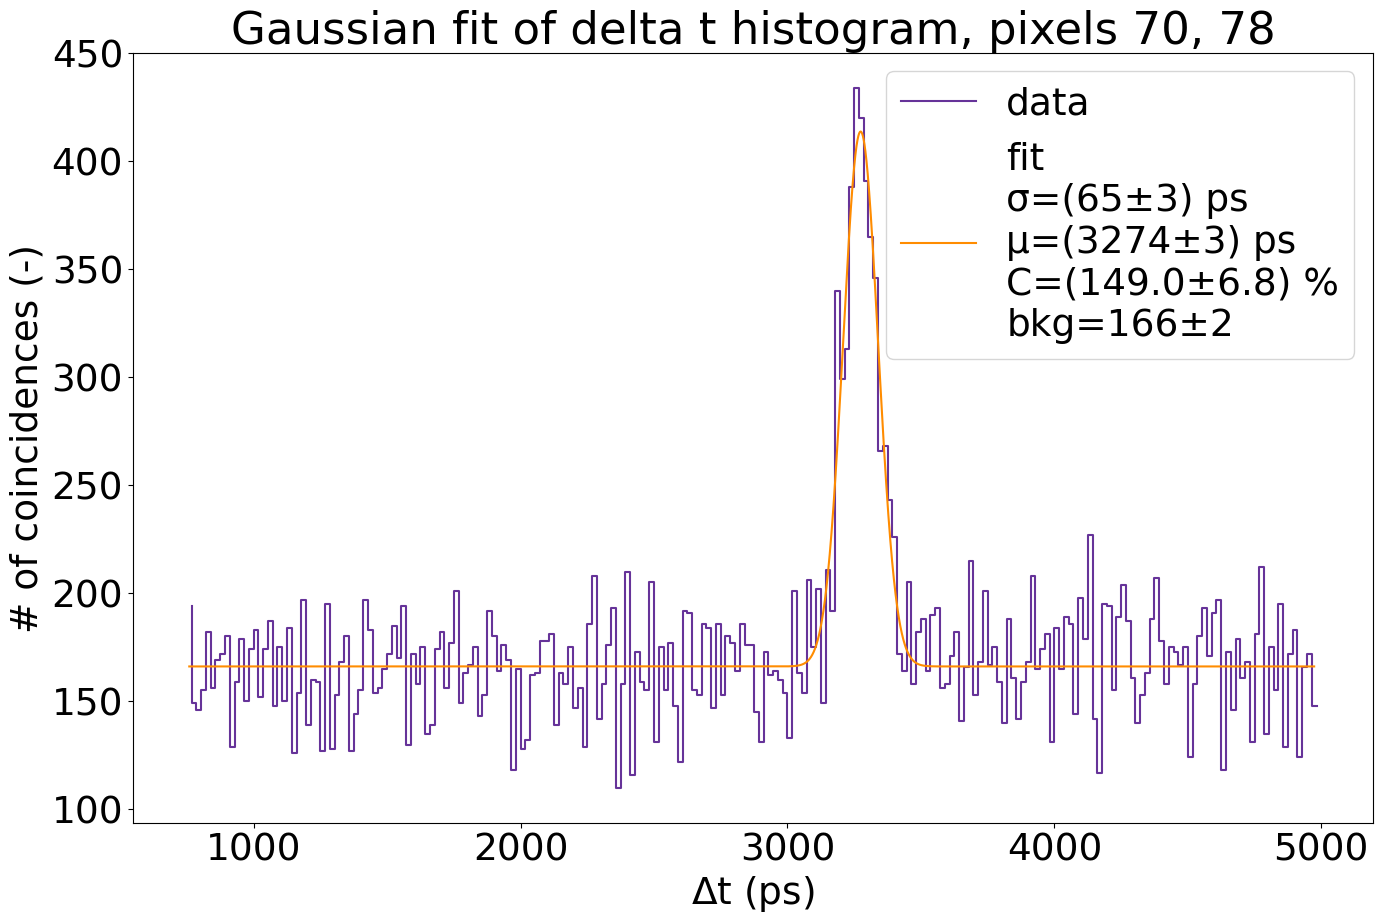

In [11]:
fits.fit_with_gaussian(
    path,
    pixels = [70, [77, 78]],
)

Here, one can try changing the window width around the peaks found and change the binning to achieve a better fit.

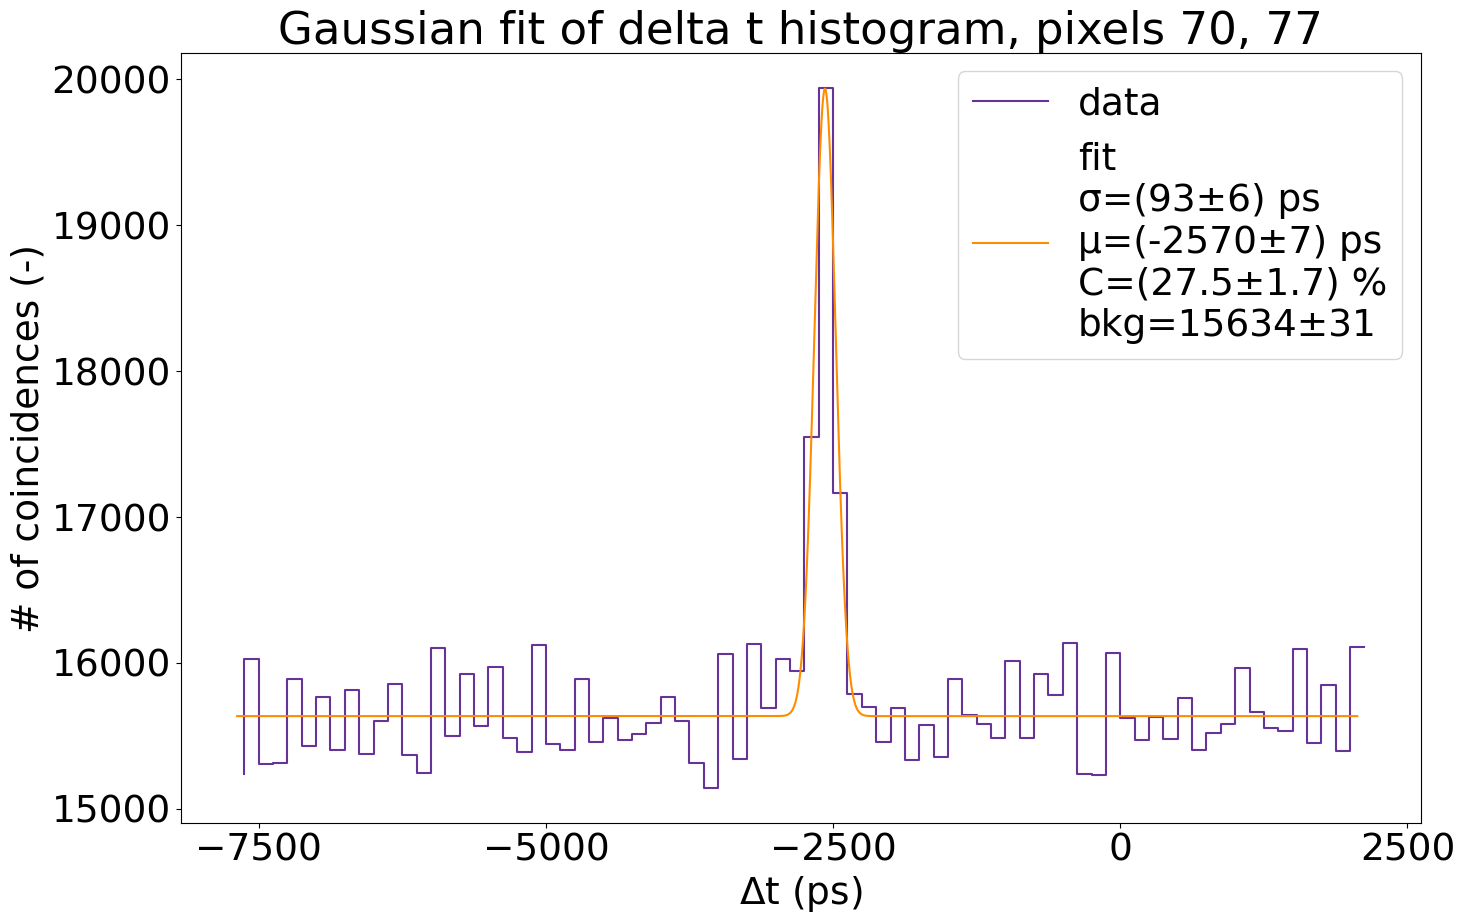

In [12]:
fits.fit_with_gaussian(
    path,
    pixels = [70,77],
    window = 10e3,
    multiplier = 7,
)

If raw '.dat' data are not available, the '.feather' file can be used directly.

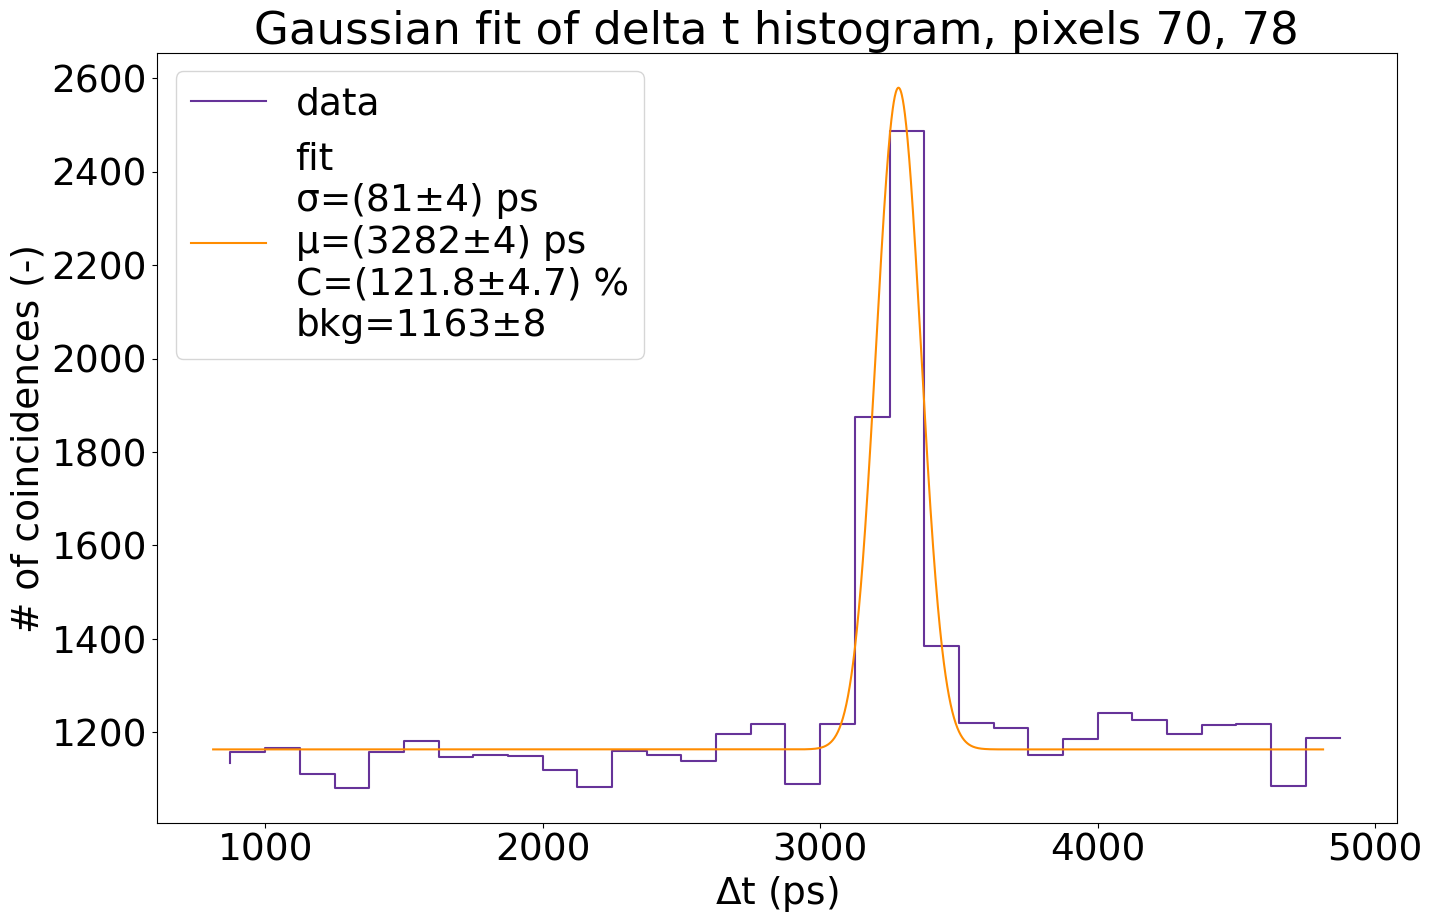

In [ ]:
# Relative path to the feather file
ft_file_77 = r'D:\LinoSPAD2\Data\B7d\CT_HBT\70-77\delta_ts_data\0000028100-0000032199.feather'

fits.fit_with_gaussian(
    path,
    pixels = [70,78],
    ft_file=ft_file_77,
    multiplier=7,
    pickle_figure=True
    )


When interested in returned parametres only, adjust binning and window around peak, set the 'return_fit_parametres' as True, close the unwanted figure and print out the fit parametres.

In [15]:
# Change the window around peak and coarser binning for a better fit
fit_params = fits.fit_with_gaussian(
    path,
    pixels = [70,77],
    window = 8e3,
    multiplier = 5,
    return_fit_params=True
)

# Close the figure
plt.close()

print(fit_params)

{'70,77':         Fit parameter  Peak at -2572 ps
0         center (ps)      -2572.353189
1   center_error (ps)         10.659859
2          sigma (ps)        104.320131
3    sigma_error (ps)         10.787817
4        contrast (%)         24.354426
5  contrast_error (%)          2.164707}


One can set the 'pickle_figure' parameter in any of the functions as True to pickle both the plot itself and the data used for it in a standalone '.pkl' file. This saves data as a dictionary with keys "Histogram" and "Fit_i", where "_i" stands for the fit number (if there are multiple peaks and, hence, fits). Each value is a tuple containing the x and y data of the corresponding line plot. The '.pkl' file is saved together with the '.png' in the "results" folder. 

To unpickle the figure, import absolute path to the '.pkl' file and retrieve data as shown below.

(2500.0, 4800.0)

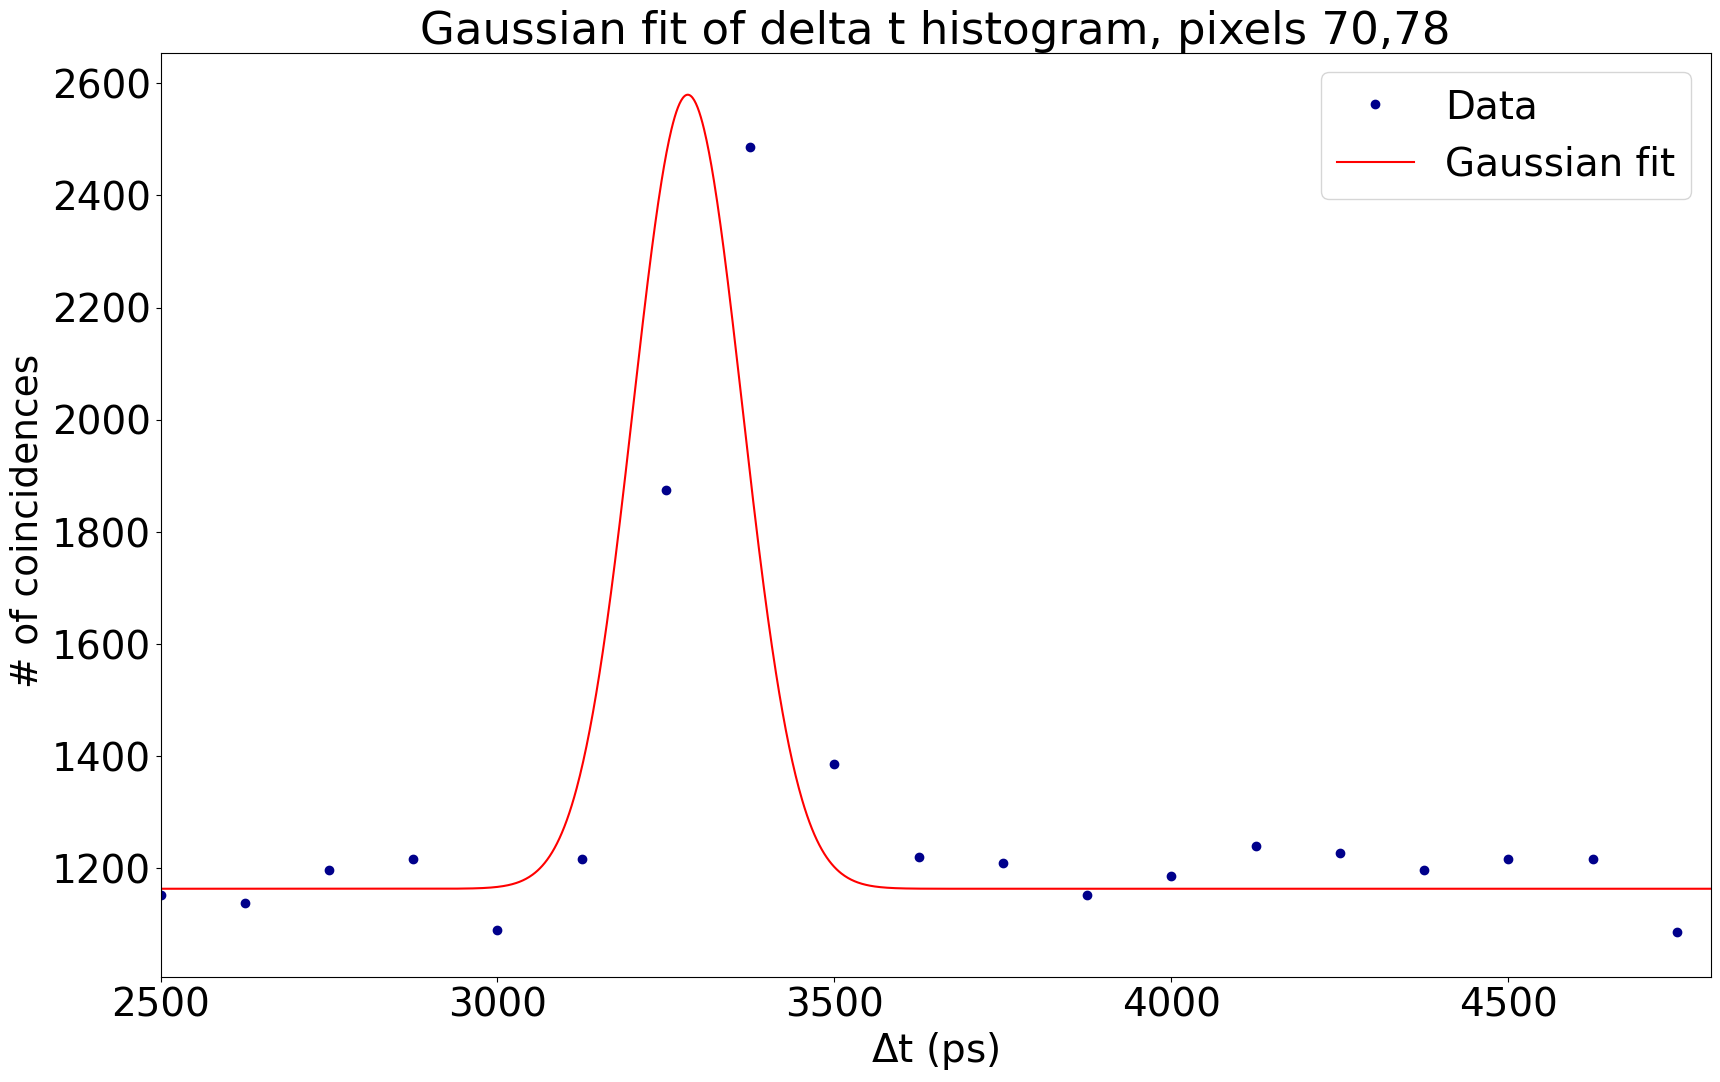

In [18]:
# Absolute path to the '.pkl' file
path78_pickled = r"D:\LinoSPAD2\Data\B7d\CT_HBT\70-77\delta_ts_data\0000028100-0000032199_pixels_70,78_fit.pkl"

# Close figure if interested only in the data
unpickled_plot = fits.unpickle_fit(path78_pickled)
plt.close()


# Retrieving data

# Histogram data
bins = unpickled_plot[1]["Histogram"][0]
data = unpickled_plot[1]["Histogram"][1]

# Fit data
fit1_x = unpickled_plot[1]["Fit_1"][0]
fit1_y = unpickled_plot[1]["Fit_1"][1]

# Plot
plt.figure(figsize=(20, 12))
plt.plot(bins,data, "o", color="darkblue", label="Data")
plt.plot(fit1_x,fit1_y, color="red", label="Gaussian fit")

plt.legend(fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.title("Gaussian fit of delta t histogram, pixels 70,78")
plt.xlabel(r"$\Delta$t (ps)", size=28)
plt.ylabel("# of coincidences ")

# Narrower window
plt.xlim(2500,4800)


When using 'fit_with_gaussian_fancy', one can get fit parametres, use 'ft_file' or pickle plot as in the previous cases. 

[[Model]]
    (Model(gaussian) + Model(linear))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 75
    # data points      = 79
    # variables        = 5
    chi-square         = 0.03433196
    reduced chi-square = 4.6395e-04
    Akaike info crit   = -601.548992
    Bayesian info crit = -589.701752
    R-squared          = 0.73520099
[[Variables]]
    amplitude:  64.4818333 +/- 5.51048182 (8.55%) (init = 1496.951)
    center:    -2570.54669 +/- 9.34563916 (0.36%) (init = -2562.5)
    sigma:      93.3722560 +/- 8.02196211 (8.59%) (init = 1625)
    fwhm:       219.874856 +/- 18.8902767 (8.59%) == '2.3548200*sigma'
    height:     0.27550508 +/- 0.02171043 (7.88%) == '0.3989423*amplitude/max(1e-15, sigma)'
    slope:      1.7276e-06 +/- 8.6743e-07 (50.21%) (init = -2.880491e-07)
    intercept:  1.00487979 +/- 0.00248492 (0.25%) (init = 1.011284)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)     = +0.5771
    C(amplitude, interc

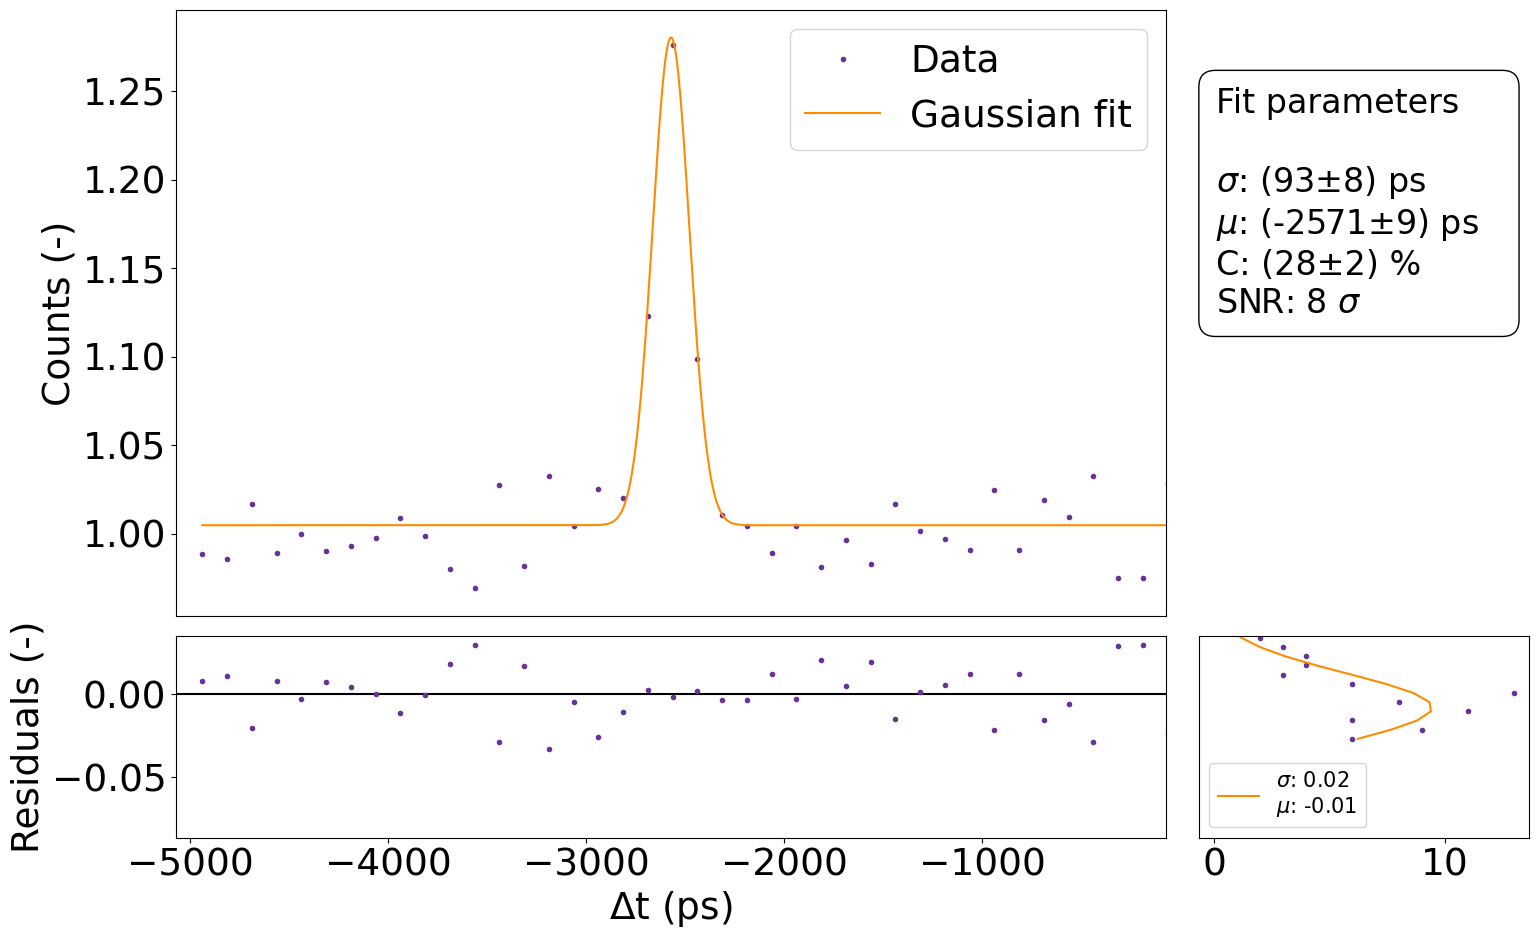

In [19]:
fits.fit_with_gaussian_fancy(
    path,
    pixels = [70,77],
    range_left = -5e3,
    range_right = 5e3,
    multiplier = 7,
    return_fit_params = False,
    interpolate_fit = True,
    correct_pix_address = False,
    pickle_figure = False
)